In [87]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning
* Handling missing values
* Handling duplicates
* check data  types
* understanding the data set 

In [88]:
## features with the missing value
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for features in features_with_na:
    print(features, np.round(df[features].isnull().mean(),*100,4),  ' % missing values')

print(features_with_na)

[]


#### IS there any duplicates value

In [89]:
df.duplicated().sum()

0

No duplicates vales

In [90]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,Company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20


In [91]:
df.drop('case_id' , inplace=True , axis= 1)

KeyError: "['case_id'] not found in axis"

### Feature Engineering 

In [ ]:
from datetime import date

todays_date = date.today()
current_year = todays_date.year

In [ ]:
current_year

2025

In [ ]:
df['Company_age'] = current_year - df['yr_of_estab']
df.head()

KeyError: 'yr_of_estab'

In [ ]:
df.drop('yr_of_estab' , inplace=True , axis= 1)

### Types of Features 


In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Total number of numerical features: {len(numerical_features)} and the numerical features are: {numerical_features}")


Total number of numerical features: 3 and the numerical features are: ['no_of_employees', 'prevailing_wage', 'Company_age']


In [ ]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
print(f"Total number of categorical features: {len(categorical_features)} and the categorical features are: {categorical_features}")

Total number of categorical features: 8 and the categorical features are: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


### Split the data set X and Y 

In [ ]:
X = df.drop('case_status' , axis=1)
y = df['case_status']

In [ ]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,Company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [ ]:
y = np.where(y == 'Denied' , 1, 0)

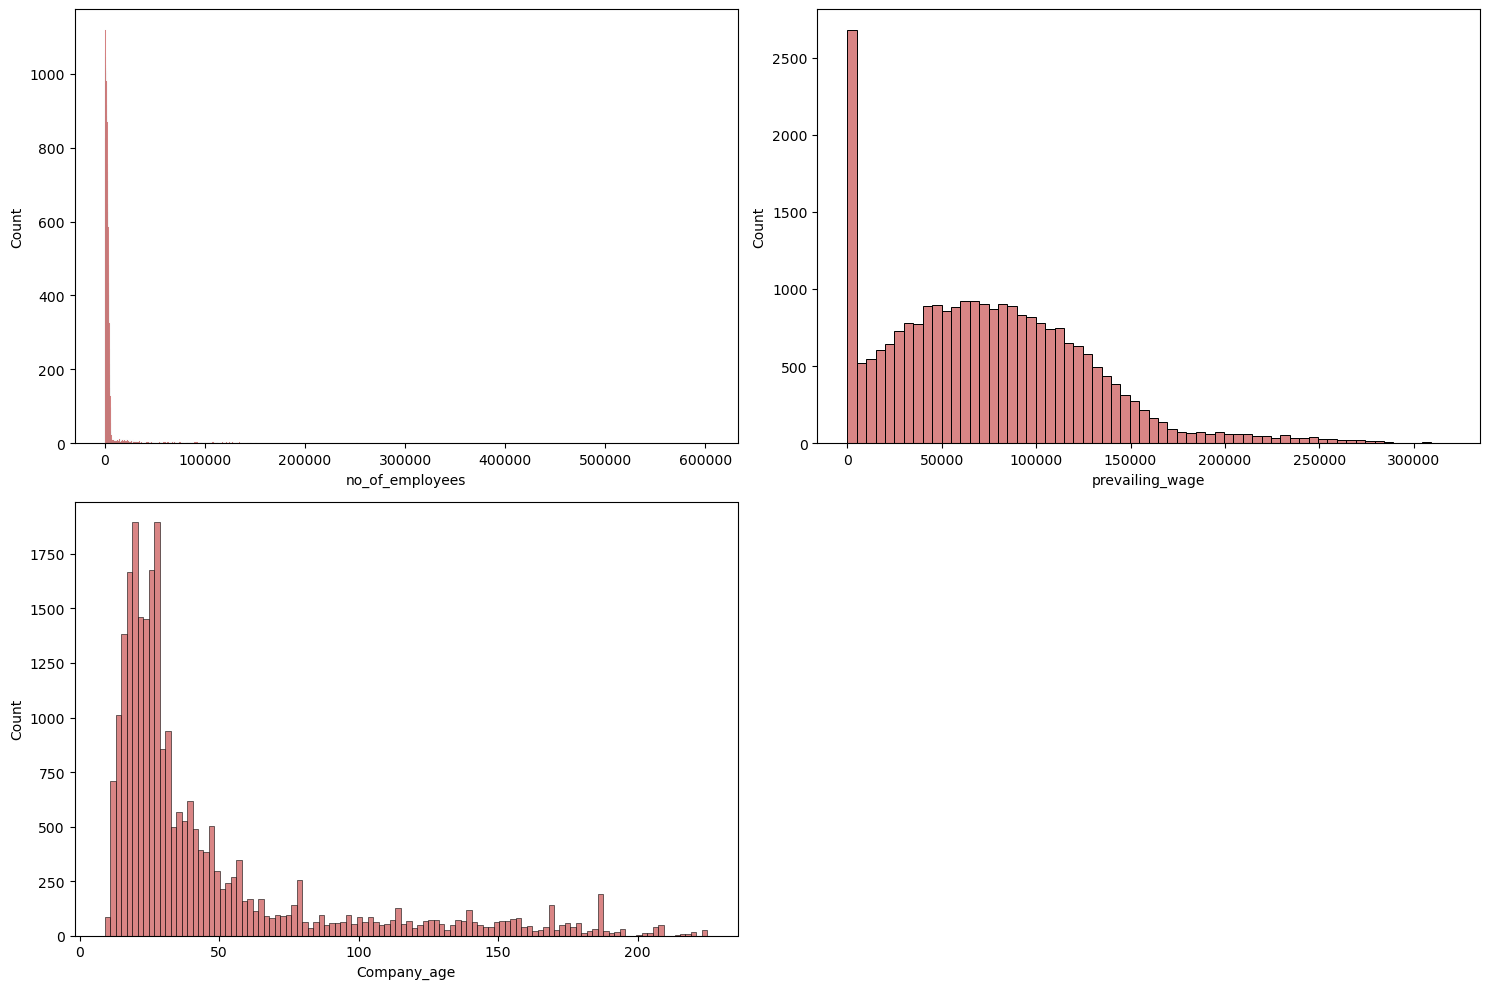

In [ ]:
plt.figure(figsize=(15,10))
for i , col in enumerate(['no_of_employees' , 'prevailing_wage' , 'Company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x = X[col] ,color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
continuous_features = [features for features in numerical_features if len(df[features].unique() > 25)]
print(continuous_features)

['no_of_employees', 'prevailing_wage', 'Company_age']


In [ ]:
X[continuous_features].skew(axis = 0, skipna = True)

no_of_employees    12.265260
prevailing_wage     0.755776
Company_age         2.037301
dtype: float64

## In order to rempve the Outliers we need to use the Power Transformers to check if it can reduce the outliers

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
transform_features = ['Company_age' , 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [ ]:
X_copy = pd.DataFrame(X_copy , columns=transform_features)

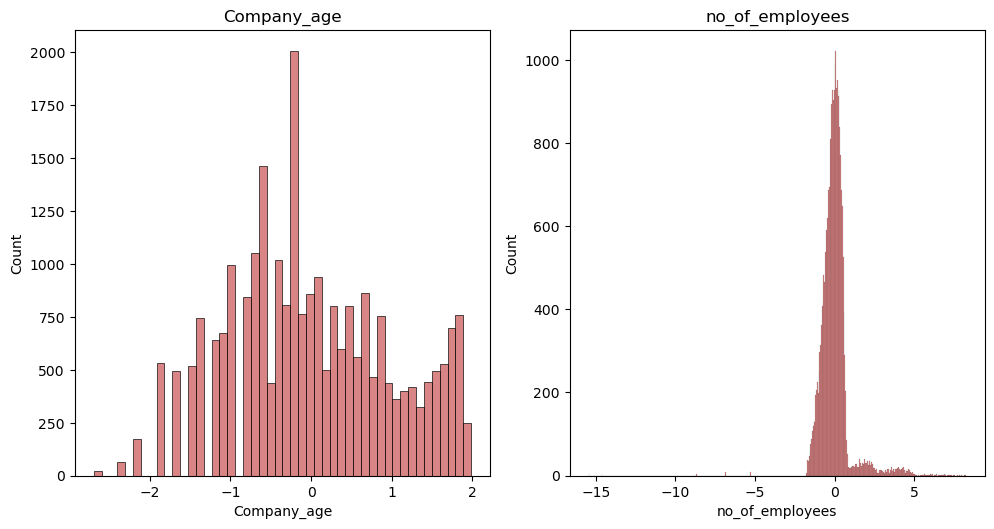

In [ ]:
plt.figure(figsize=(15,10))
for i , col in enumerate(transform_features):
    plt.subplot(2,3,i+1)
    sns.histplot(x = X_copy[col] , color="indianred")
    plt.title(col)
    plt.tight_layout()
    

In [ ]:
X_copy.skew(axis=0, skipna=True)

Company_age        0.112260
no_of_employees    0.399339
dtype: float64

In [ ]:
for features in categorical_features:
    print(features ,":" , df[features].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


### Column Transformation

In [98]:
or_columns = ['has_job_experience','education_of_employee','requires_job_training','full_time_position']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transformer_columns = ['no_of_employees','Company_age']

from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transformers
numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

# PowerTransformer pipeline
transform_pipeline = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("OnehotEncoding", oh_transformer, oh_columns),
        ("OrdinalEncoding", ordinal_transformer, or_columns),
        ("Transformer", transform_pipeline, transformer_columns),
        ("StandardScaler", numerical_transformer, numerical_features)
    ]
)


In [99]:
X = preprocessor.fit_transform(X)

In [100]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

### Handling the imbalance of the Datset

In [102]:
from imblearn.combine import SMOTEENN , SMOTETomek

smt = SMOTEENN(random_state = 42 , sampling_strategy = 'minority')
X_res , y_res = smt.fit_resample(X , y)

### Test and Split the data set

In [108]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_res , y_res , test_size = 0.2 , random_state = 42)
X_train.shape , X_test.shape 

((13629, 24), (3408, 24))

In [111]:
!pip install catboost  xgboost

  Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 1.9 MB/s eta 0:00:0000:0100:01
Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [113]:
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay , precision_score , recall_score , f1_score , roc_auc_score ,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier 

In [114]:
def evaluate_score(true , predicted):
    acc = accuracy_score(true , predicted)
    f1 = f1_score(true , predicted)
    recall = recall_score(true , predicted)
    precision = precision_score(true , predicted)
    roc = roc_auc_score(true , predicted)
    return acc , f1 , recall , precision , roc

In [116]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "AdaBoost Classifier" : AdaBoostClassifier(),
    "XGB Classifier" : XGBClassifier(),
    "CatBoost Classifier" : CatBoostClassifier(),
}

In [125]:
def evaluate_model(X , y , models):
    X_train , X_test , y_train ,y_test = train_test_split(X , y , test_size=0.2 , random_state= 42)

    model_list = []
    accuracy_list = []
    auc = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train , y_train)

        # make prediction 
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy , model_train_f1_model , model_train_recall_score , model_train_precession_score , model_train_roc = evaluate_score(y_test , y_test_pred)
        model_test_accuracy , model_test_f1_model , model_test_recall_score , model_test_precession , model_test_roc_score = evaluate_score(y_test , y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("Model Performace of the Training Set")
        print("Accuracy: {:.4f}".format(model_train_accuracy))
        print("F1 Score: {:.4f}".format(model_train_f1_model))
        print("Recall Score: {:.4f}".format(model_train_recall_score))
        print("Precision Score: {:.4f}".format(model_train_precession_score))
        print("ROC Score: {:.4f}".format(model_train_roc))
        print("<------------------------------->")
        print("Model Performace of the Testing Set")
        print("Accuracy: {:.4f}".format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print("F1 Score: {:.4f}".format(model_test_f1_model))
        print("Recall Score: {:.4f}".format(model_test_recall_score))
        print("Precision Score: {:.4f}".format(model_test_precession))
        print("ROC Score: {:.4f}".format(model_test_roc_score))
        auc.append(model_test_roc_score)
        print('='*35)
        print('\n')

        report = pd.DataFrame(list(zip(model_list, accuracy_list)) , columns=['Model Name' , 'Accuarcy'].sort_values(by = 'Accuarcy' , ascending = False))

        return report


In [ ]:
base_model_report = evaluate_model(X = X_res , y = y_res , models = models)